#Exploratory Data Analysis - IPL
#TSF Task - 4
By- Shubhendu Mishra

#Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read The matches dataset 

In [2]:
matches=pd.read_csv('/content/matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#Let's start basic data exploration

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#Basic Statistical description of the dataset

In [4]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#How many number of IPL seasons data do we have?

In [6]:
len(matches['season'].unique())

12

So here we are provided with data of 12 IPL seasons

In [47]:

season=(matches['season'].unique())
season

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [49]:
season_series=pd.Series(season)
season_series

0     2017
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2018
11    2019
dtype: int64

#checking Null or Missing values

In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

So as we see above there are missing values in 'city', 'winner', 'Player_of_match' and 'umpire' category.
we need to treat these missing values

# Treatment of missing values

In [8]:
matches[matches.city.isnull()][['city', 'date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


For treatment of missing values, we find out the dates of the matches and then search the missing values in google. Like for example to replace missing values in city column we can find out the place where match happened from google and then fill in the missing value 

In [9]:
matches.city=matches.city.fillna('Dubai')
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#Similar treatment for other variables as well..

In [10]:
matches[matches.winner.isnull()][['result', 'winner', 'player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


Now here we see that values are NaN for the matches with no result. This is well justified. So we do not need to worry about these. we can directly remove them

#Total Number of wins for all the IPL teams in the IPL History

In [11]:
teams=matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Mumbai Indians Tops the table with 109 wins followed by Chennai Super Kings and Kolkata Knight riders

#Which team has won by maximum number of runs till date?

In [12]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

Mumbai Indians won by 146 runs against Delhi Daredevils in the year 2017 and the player of the match was LMP Simmons

#Which team has won by maximum number of wickets?

In [13]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

#How many teams have won by 10 wickets?

In [14]:
Won_by_10_wickets=matches[matches.win_by_wickets==10]
Won_by_10_wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


#Which team has won by 10 wickets more than once?

In [15]:
Won_by_10_wickets['winner'].value_counts()

Royal Challengers Bangalore    3
Rajasthan Royals               1
Kolkata Knight Riders          1
Deccan Chargers                1
Sunrisers Hyderabad            1
Mumbai Indians                 1
Delhi Daredevils               1
Kings XI Punjab                1
Chennai Super Kings            1
Name: winner, dtype: int64

#Team which won by 1 wicket in a close encounter

In [16]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

#Matches in every season

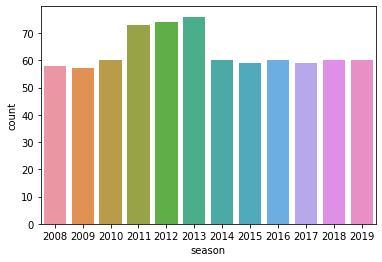

In [17]:
sns.countplot(x='season', data=matches)
plt.show()

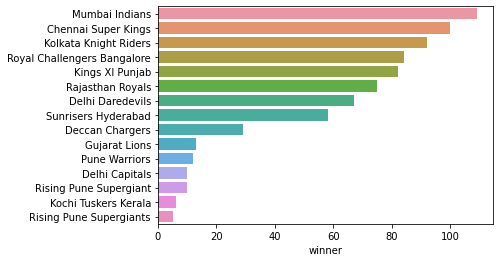

In [18]:
#sns.countplot(y='winner', data = matches)
#plt.show
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

#Player who received most number of Player of the match award

<Figure size 360x360 with 0 Axes>

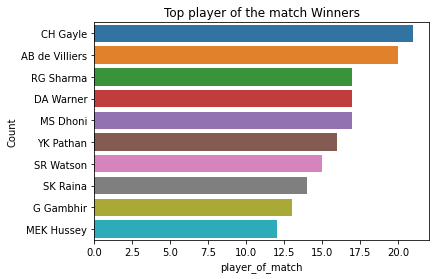

In [19]:
plt.figure(figsize=(5,5))
top_players = matches.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players, y =top_players.index , orient='h'); 
plt.show()

Now Just see the irony...
Chris gayle has won maximum number of player of the match award but he was not selected in the first round of auction

#How the toss winning has proved decisive for the match winning as well?

In [20]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    363
True     393
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


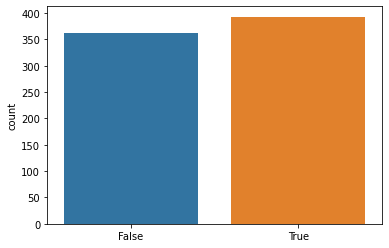

In [21]:

sns.countplot(ss);

So winning the toss has played a major role in match winning

#What do the teams prefer to do after winning the toss?

In [22]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

#Teams which have won maximum number of matches after winning toss

In [23]:
toss_win_match=matches['toss_winner'].value_counts()
toss_win_match

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Most matches won by teams after winning the toss')

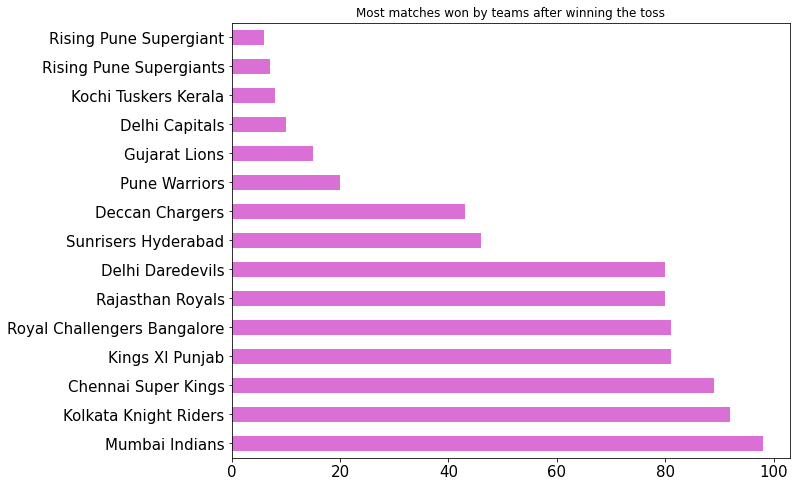

In [24]:
most_match_win=toss_win_match.plot(kind='barh', figsize=(10,8), color='orchid', fontsize=15)
plt.style.use('dark_background')
plt.title('Most matches won by teams after winning the toss')

So win the toss, execute well and win matches...

In [25]:
matches['toss_winner'].replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants', inplace=True)


Since Rising pune Supergiants was printed twice due to spelling error, we have corrected

In [26]:
toss_win_match=matches['toss_winner'].value_counts()
toss_win_match

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

#Number of times team has won batting first

In [27]:
bat_first_win=matches.winner[matches.win_by_runs!=0].value_counts()
bat_first_win

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

Text(0.5, 1.0, 'Matches won by teams batting first in IPL History')

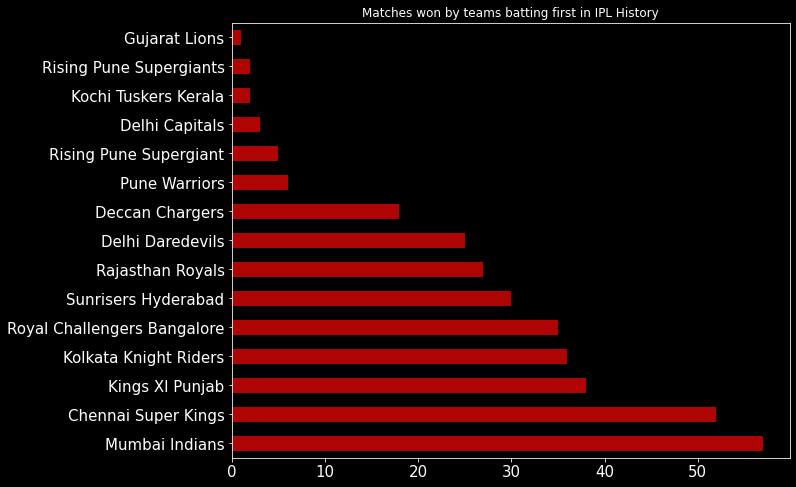

In [28]:
bat_first_win=bat_first_win.plot(kind='barh', figsize=(10,8), color=('#ae0404'), fontsize=15)
plt.style.use('dark_background')
plt.title('Matches won by teams batting first in IPL History')

#Number of wins batting second

In [29]:
bat_second_win=matches.winner[matches.win_by_wickets!=0].value_counts()
bat_second_win

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

Text(0.5, 1.0, 'Matches won by teams batting second in IPL History')

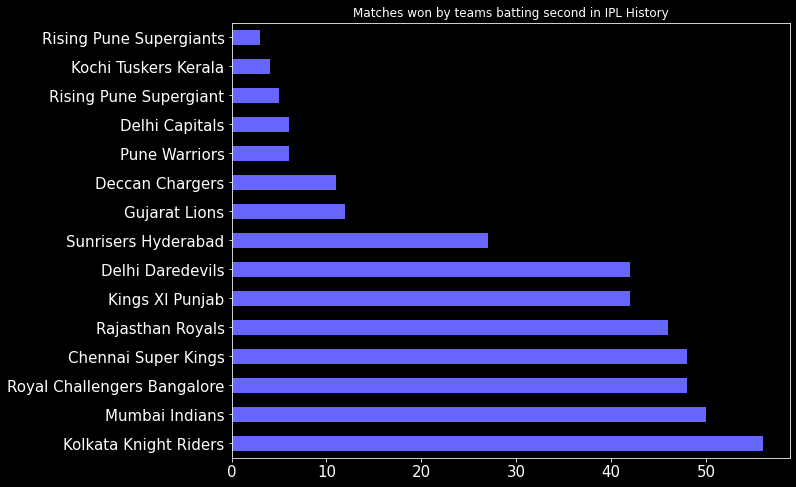

In [30]:
bat_second_win=bat_second_win.plot(kind='barh', figsize=(10,8), color=('#6666ff'), fontsize=15)
plt.style.use('dark_background')
plt.title('Matches won by teams batting second in IPL History')

#Now we read the second dataset

In [31]:
deliveries=pd.read_csv('/content/deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


#most Number of deliveries faced by the batsman

In [32]:
most_deliveries_batsman=deliveries['batsman'].value_counts().head(10)
most_deliveries_batsman

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

Text(0.5, 1.0, 'Most deliveries played by batsman in IPL History')

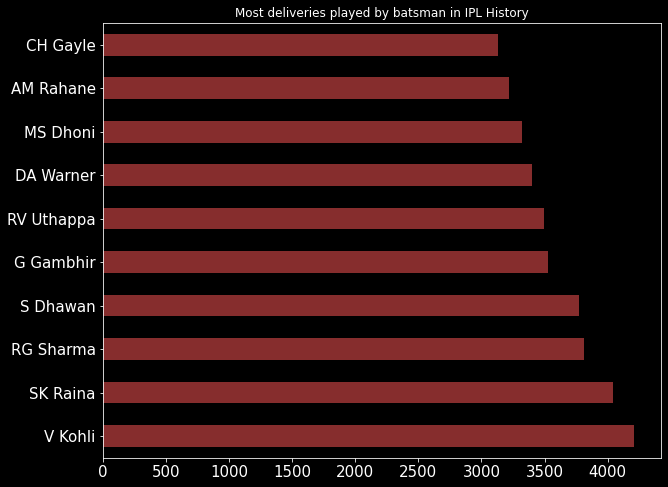

In [33]:
most_deliveries_play=most_deliveries_batsman.plot(kind='barh', figsize=(10,8), color=('#862d2d'), fontsize=15)
plt.style.use('dark_background')
plt.title('Most deliveries played by batsman in IPL History')

#Most Number of deliveries bowled by bowler

In [34]:
most_deliveries_bowler=deliveries['bowler'].value_counts().head(10)
most_deliveries_bowler

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

Text(0.5, 1.0, 'Most number of deliveries bowled by bowlers in IPL History')

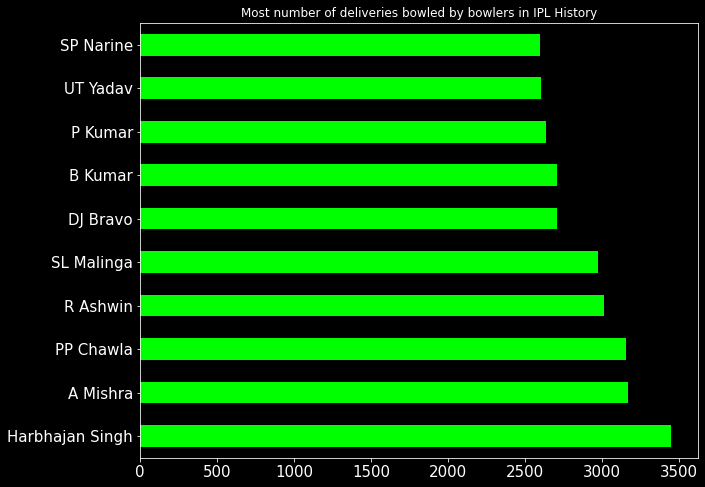

In [35]:
most_deliveries_bowler=most_deliveries_bowler.plot(kind='barh', figsize=(10,8), color=('#00ff00'), fontsize=15)
plt.style.use('dark_background')
plt.title('Most number of deliveries bowled by bowlers in IPL History')

#Maximum runs Scored by batsman in IPL

In [36]:
max_runs=deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
max_runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

The top three scorers are from Indian Team..
Now let's see who is consistent among the three top scorers...

#extra runs conceeded by bowlers

In [37]:
extra_runs=deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False).head(10)
extra_runs

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
SR Watson          171
DW Steyn           171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

Text(0.5, 1.0, 'Most extra runs conceeded by bowlers in IPL History')

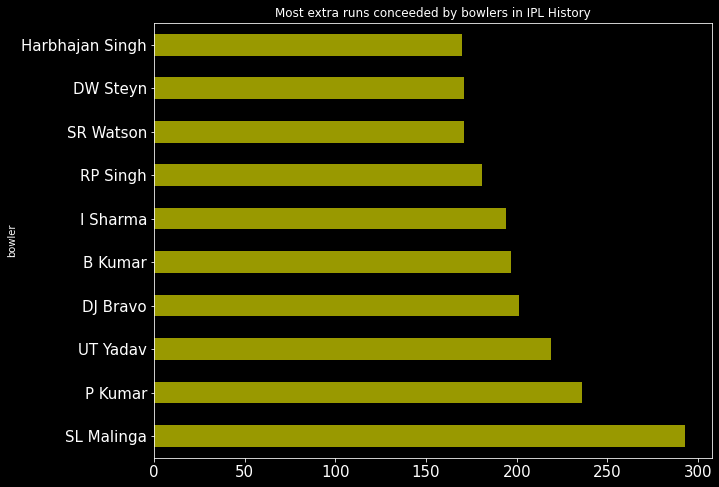

In [38]:
extra_runs=extra_runs.plot(kind='barh', figsize=(10,8), color=('#999900'), fontsize=15)
plt.style.use('dark_background')
plt.title('Most extra runs conceeded by bowlers in IPL History')

#bowlers with most number of dot deliveries

In [39]:
dot_balls=deliveries.bowler[deliveries.total_runs==0].value_counts().head(10)
dot_balls

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

Text(0.5, 1.0, 'Most number dot balls bowled by bowler in IPL History')

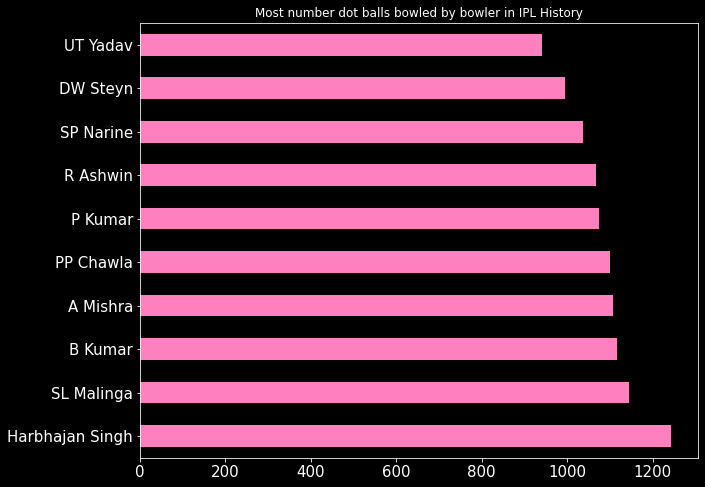

In [40]:
dot_balls=dot_balls.plot(kind='barh', figsize=(10,8), color=('#ff80bf'), fontsize=15)
plt.style.use('dark_background')
plt.title('Most number dot balls bowled by bowler in IPL History')

In [41]:
dismissal_type=deliveries['dismissal_kind'].value_counts()
dismissal_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'Dismissal types of batsman in IPL History')

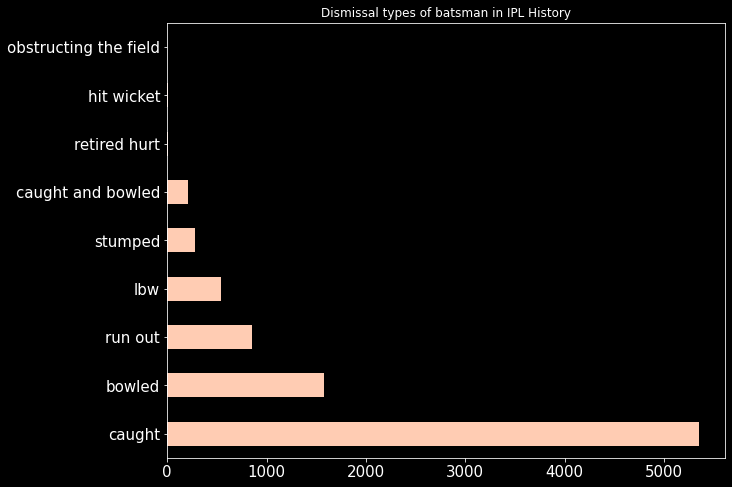

In [42]:
dismissal_type=dismissal_type.plot(kind='barh', figsize=(10,8), color=('#ffccb3'), fontsize=15)
plt.style.use('dark_background')
plt.title('Dismissal types of batsman in IPL History')

In [43]:
super_over=deliveries['is_super_over'].value_counts()
super_over

0    178997
1        81
Name: is_super_over, dtype: int64

So there are a total of 81 deliveries bowled in a super overs

#Key Insights from the analysis of IPL Dataset

1. Most Number of matches were played in year 2013.
2. Indians dominate the position of Top 15 scorers with Virat Kohli being first, Suresh Raina second and Rohit Sharma third.
3. Among the three top run getters, Suresh raina has been the most consistent.
3. Chris Gayle recieved the maximum number of Player of the match award.
4. Harbhajan Singh has bowled Most number of dot deliveries so far.
5. Virat kohli has played most number of deliveries so far. 